# Word2Vec

Word2Vec - нейросетевой алгоритм, который можно использовать для векторизации текста. Он состоит из одного скрытого слоя и одного слоя проекции. Данный алгоритм позволяет учитывать не только статистические характеристики слов, но и взаимосвязь их в предложении. Сам алгоритм содержит в себе две модели: Skip-Gram и CBOW, которые были описаны в сравнительной характеристике методов векторизации:

https://docs.google.com/spreadsheets/d/1I4a-wPC-n3bFgrATCmp2D33UwkeczqTXHeirSiHPGFU/edit?usp=sharing

Рассмотрим основные возможности данного алгоритма, реализованного в библиотеке gensim.

Создадим датасет на базе произведения "Идиот" Ф.М. Достоевского. Выполнил препроцессинг текста и каждое предложение перенесём в список.

In [1]:
from sklearn.feature_extraction.text import CountVectorizer

In [2]:
f = open('idiot.txt', 'r')
data = f.read()
data = list(filter(lambda s : len(s) > 2, data.split('.')))
data[0:5]

['В конце ноября, в оттепель, часов в девять утра, поезд Петербургско-Варшавской железной дороги на всех парах подходил к Петербургу',
 ' Было так сыро и туманно, что насилу рассвело; в десяти шагах, вправо и влево от дороги, трудно было разглядеть хоть что-нибудь из окон вагона',
 ' Из пассажиров были и возвращавшиеся из-за границы; но более были наполнены отделения для третьего класса, и всё людом мелким и деловым, не из очень далека',
 ' Все, как водится, устали, у всех отяжелели за ночь глаза, все назяблись, все лица были бледножелтые, под цвет тумана',
 '\n\nВ одном из вагонов третьего класса, с рассвета, очутились друг против друга, у самого окна, два пассажира, — оба люди молодые, оба почти налегке, оба не щегольски одетые, оба с довольно замечательными физиономиями, и оба пожелавшие, наконец, войти друг с другом в разговор']

In [3]:
cv = CountVectorizer()
data = list(map(cv.build_preprocessor(), data))
text_corpus = list(map(cv.build_tokenizer(), data))
#text_corpus = list(map(lambda elem : ' '.join(elem), listed_rows))
text_corpus[0]

['конце',
 'ноября',
 'оттепель',
 'часов',
 'девять',
 'утра',
 'поезд',
 'петербургско',
 'варшавской',
 'железной',
 'дороги',
 'на',
 'всех',
 'парах',
 'подходил',
 'петербургу']

Создадим генератор данных из корпуса и объявим модель Word2Vec.

In [4]:
import gensim.models

In [5]:
class Corpus:
    def __init__(self, data):
        self.data = data
    def __iter__(self):
        for line in self.data:
            yield line

In [6]:
sentences = Corpus(text_corpus)
model = gensim.models.Word2Vec(sentences)

Можно получить вектор для конкретного слова.

In [7]:
vec1 = model.wv['большой']
vec1

array([ 0.23463045, -0.06550453,  0.47465178, -0.02641075,  0.09829453,
       -0.12611814, -0.12440079,  0.06263675,  0.24977416,  0.2773868 ,
       -0.11974979, -0.0461483 , -0.13119695,  0.02417227, -0.14441031,
        0.32880923,  0.10411028,  0.3710668 ,  0.19639128, -0.03419941,
       -0.10486273,  0.2413523 ,  0.3209952 , -0.02088092, -0.10500664,
        0.04569412, -0.10534856, -0.02274521, -0.04787788, -0.1070997 ,
        0.09849396,  0.24132296,  0.07788125, -0.07660164, -0.10449001,
        0.04285698, -0.1071218 , -0.23463748,  0.08214954, -0.15598509,
        0.23683609,  0.24968506,  0.05315503,  0.42279214,  0.05181926,
        0.24717496,  0.00752579,  0.12460137,  0.00488649, -0.3650712 ,
       -0.14845838, -0.01503025,  0.07333352, -0.10161903,  0.00905421,
       -0.2202108 , -0.16669962, -0.07843188, -0.2538597 , -0.0913377 ,
       -0.15804565,  0.15725873,  0.15849385,  0.22541898,  0.23006731,
        0.29302153, -0.22988614, -0.11654227, -0.21984485, -0.17

Получить для конректного слова наиболее похожие на него в рамках корпуса.

In [8]:
model.most_similar('большой')

<ipython-input-8-f94993e93d5a>:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  model.most_similar('большой')


[('моей', 0.9997587203979492),
 ('час', 0.9997578859329224),
 ('самым', 0.9997537732124329),
 ('долго', 0.999746561050415),
 ('совершенно', 0.9997458457946777),
 ('мгновение', 0.9997426867485046),
 ('жизни', 0.9997276663780212),
 ('свою', 0.9997244477272034),
 ('которая', 0.9997185468673706),
 ('другие', 0.9997164011001587)]

Сохранить обученную модель и загрузить модель с диска:

In [9]:
import tempfile

with tempfile.NamedTemporaryFile(prefix='model-', delete=False) as tmp:
    model.save(tmp.name)
    model2 = gensim.models.Word2Vec.load(tmp.name)

model2

Можно варьировать различные параметры модели.

Например, можно добавлять в словарь слова, которые встречаются в корпусе с достаточной частотой. Стоит заметить, что так результаты получаются более осмысленными.

In [10]:
model = gensim.models.Word2Vec(sentences=sentences, min_count=100)

In [11]:
model.most_similar('князь')

<ipython-input-11-7219a9a426fd>:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  model.most_similar('князь')


[('сами', 0.9982596635818481),
 ('разве', 0.9979156255722046),
 ('почему', 0.9974744319915771),
 ('говорю', 0.997421383857727),
 ('хотел', 0.9973253607749939),
 ('там', 0.9973182678222656),
 ('будет', 0.9972404837608337),
 ('сегодня', 0.9971522092819214),
 ('нас', 0.9971197247505188),
 ('здесь', 0.9971163272857666)]

Ключевым параметров модели является размерность признакового пространства для векторов. Настроить его можно следующим образом:

In [12]:
%%time
model1 = gensim.models.Word2Vec(sentences=sentences, min_count=100, size=50)

CPU times: user 943 ms, sys: 30 ms, total: 973 ms
Wall time: 495 ms


In [13]:
%%time
model2 = gensim.models.Word2Vec(sentences=sentences, min_count=100, size=100)

CPU times: user 799 ms, sys: 15.4 ms, total: 815 ms
Wall time: 459 ms


In [14]:
%%time
model3 = gensim.models.Word2Vec(sentences=sentences, min_count=100, size=200)

CPU times: user 961 ms, sys: 14 ms, total: 975 ms
Wall time: 502 ms


In [15]:
%%time
model4 = gensim.models.Word2Vec(sentences=sentences, min_count=100, size=500)

CPU times: user 1.56 s, sys: 16.4 ms, total: 1.58 s
Wall time: 692 ms


In [16]:
model1.most_similar('князь')

<ipython-input-16-206304a8e816>:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  model1.most_similar('князь')


[('разве', 0.995221734046936),
 ('почему', 0.9942988157272339),
 ('вскричал', 0.9942777156829834),
 ('сказал', 0.9934864044189453),
 ('такое', 0.9932031631469727),
 ('говорю', 0.9931114912033081),
 ('зачем', 0.9927220940589905),
 ('знаете', 0.9925858378410339),
 ('давеча', 0.9925227165222168),
 ('сами', 0.992480993270874)]

In [17]:
model2.most_similar('князь')

<ipython-input-17-fb586398f99d>:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  model2.most_similar('князь')


[('сами', 0.998040497303009),
 ('разве', 0.9979743361473083),
 ('сказал', 0.9974197149276733),
 ('вскричал', 0.9973633289337158),
 ('говорю', 0.9965598583221436),
 ('зачем', 0.9965318441390991),
 ('аглая', 0.9962106943130493),
 ('спросил', 0.9961959719657898),
 ('почему', 0.9961183667182922),
 ('хорошо', 0.9961069822311401)]

In [18]:
model3.most_similar('князь')

<ipython-input-18-f7ed2c6094b2>:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  model3.most_similar('князь')


[('разве', 0.999218225479126),
 ('вскричал', 0.999096691608429),
 ('такое', 0.9982872009277344),
 ('спросил', 0.9981156587600708),
 ('сами', 0.9979504346847534),
 ('хочу', 0.9976907968521118),
 ('почему', 0.9976344108581543),
 ('ничего', 0.9975821375846863),
 ('знает', 0.9975402355194092),
 ('кто', 0.9973351955413818)]

In [19]:
model4.most_similar('князь')

<ipython-input-19-2eb6968046e4>:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  model4.most_similar('князь')


[('разве', 0.9996171593666077),
 ('вскричал', 0.9995689988136292),
 ('такое', 0.9991663694381714),
 ('спросил', 0.9991142749786377),
 ('хочу', 0.9989616870880127),
 ('сказал', 0.9988739490509033),
 ('сами', 0.9988726377487183),
 ('знает', 0.9988662004470825),
 ('же', 0.9987500905990601),
 ('ничего', 0.9987019896507263)]

Как мы видим, результаты при разных размерах вектора отличаются, как и вероятности общих слов.

Модель можно также дообучить(что удобно, когда, например, имеется поток данных).

In [21]:
upd_sentences = [['биржа', 'президент', 'модно', 'компьютер'], ['доллар', 'санкции']]
model = gensim.models.Word2Vec(sentences=sentences, min_count=1)
model.build_vocab(upd_sentences, update=True)
model.train(upd_sentences, total_examples=model.corpus_count, epochs=model.epochs)

(2, 30)

In [22]:
model.most_similar('биржа')

<ipython-input-22-5e0f069f0615>:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  model.most_similar('биржа')


[('президент', 0.31733420491218567),
 ('мстительный', 0.26500850915908813),
 ('просияла', 0.248514324426651),
 ('разуверили', 0.2422444224357605),
 ('умолкнуть', 0.24180573225021362),
 ('оправдаться', 0.23880596458911896),
 ('поступкам', 0.2270101010799408),
 ('упивался', 0.22110992670059204),
 ('тащишь', 0.21947556734085083),
 ('подличал', 0.2161554992198944)]

Как можно заметить, вероятности того, что "биржа" окажется в контексте какого-нибудь слова из произведения 19 века, малы.

Второй ключевой гиперпараметр модели - размер скользящего окна. Посмотрим результат при его изменении.

In [23]:
%%time
model = gensim.models.Word2Vec(sentences=sentences, min_count=100, size=200, window=2)
model.most_similar('князь')

CPU times: user 970 ms, sys: 35.2 ms, total: 1.01 s
Wall time: 532 ms


<timed exec>:2: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).


[('теперь', 0.998115062713623),
 ('впрочем', 0.9979036450386047),
 ('тут', 0.9978523254394531),
 ('без', 0.9978126287460327),
 ('сам', 0.9978071451187134),
 ('именно', 0.997764527797699),
 ('сказать', 0.9977152943611145),
 ('ведь', 0.997685968875885),
 ('вас', 0.9975181221961975),
 ('наверно', 0.9974838495254517)]

In [24]:
%%time
model = gensim.models.Word2Vec(sentences=sentences, min_count=100, size=200, window=5)
model.most_similar('князь')

CPU times: user 1.07 s, sys: 29.4 ms, total: 1.1 s
Wall time: 530 ms


<timed exec>:2: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).


[('разве', 0.99922776222229),
 ('вскричал', 0.999096155166626),
 ('такое', 0.9982576370239258),
 ('спросил', 0.9981210827827454),
 ('сами', 0.9979745149612427),
 ('хочу', 0.997696578502655),
 ('почему', 0.9976552128791809),
 ('ничего', 0.9976552128791809),
 ('знает', 0.9975382685661316),
 ('кто', 0.997336745262146)]

In [25]:
%%time
model = gensim.models.Word2Vec(sentences=sentences, min_count=100, size=200, window=20)
model.most_similar('князь')

CPU times: user 1.19 s, sys: 28.6 ms, total: 1.22 s
Wall time: 564 ms


<timed exec>:2: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).


[('сами', 0.9992179274559021),
 ('разве', 0.9987249970436096),
 ('нас', 0.9986783862113953),
 ('вскричал', 0.9984406232833862),
 ('хотел', 0.9983989000320435),
 ('сказать', 0.9983821511268616),
 ('вами', 0.9982655048370361),
 ('хочу', 0.9982091784477234),
 ('наверно', 0.9978446960449219),
 ('тут', 0.9977786540985107)]

Можно устанавливать число эпох обучения модели.

In [26]:
%%time
model = gensim.models.Word2Vec(sentences=sentences, min_count=100, size=200, window=20, iter=100)
model.most_similar('князь')

CPU times: user 19.5 s, sys: 201 ms, total: 19.7 s
Wall time: 8.01 s


<timed exec>:2: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).


[('вам', 0.3673977255821228),
 ('лебедев', 0.3392542600631714),
 ('генерал', 0.2729954719543457),
 ('вы', 0.25921908020973206),
 ('же', 0.24974970519542694),
 ('коля', 0.23545955121517181),
 ('вами', 0.22644087672233582),
 ('ганя', 0.21733370423316956),
 ('так', 0.21562370657920837),
 ('ли', 0.20975883305072784)]

Посмотрим, какие слова являются наиболее близкими к слову "он". В вершине списка находятся также местоимения мужского рода.

In [27]:
model.most_similar('он')

<ipython-input-27-cb6aaf2889e0>:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  model.most_similar('он')


[('его', 0.4477768540382385),
 ('ему', 0.40474849939346313),
 ('сам', 0.33224254846572876),
 ('был', 0.2910105884075165),
 ('тот', 0.2609660029411316),
 ('рогожин', 0.24196462333202362),
 ('него', 0.23252986371517181),
 ('этот', 0.22207017242908478),
 ('мог', 0.22051332890987396),
 ('ипполит', 0.21096161007881165)]

Благодаря учету контекста при обучении, можно выявлять сложные признаки сходства:

In [28]:
model.most_similar(positive=['ему', 'она'], negative=['он'], topn=3)

<ipython-input-28-9e0e0ca558b2>:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  model.most_similar(positive=['ему', 'она'], negative=['он'], topn=3)


[('ней', 0.45781466364860535),
 ('ее', 0.4145718514919281),
 ('ей', 0.3716714084148407)]

Визуализируем облако слов.

In [29]:
model = gensim.models.Word2Vec(sentences=sentences, min_count=10, size=200)

In [30]:
from sklearn.decomposition import IncrementalPCA
from sklearn.manifold import TSNE
import numpy as np   
import matplotlib.pyplot as plt
import random

In [31]:
def reduce_dimensions(model):
    vectors = np.asarray(model.wv.vectors)
    #labels = np.asarray(model.wv.vocab)
    labels = [s for s in model.wv.vocab]

    tsne = TSNE(n_components=2, random_state=0)
    vectors = tsne.fit_transform(vectors)

    x_vals = [v[0] for v in vectors]
    y_vals = [v[1] for v in vectors]
    
    return x_vals, y_vals, labels

In [32]:
def plot_words(x_vals, y_vals, labels):

    random.seed(0)

    plt.figure(figsize=(12, 12))
    plt.scatter(x_vals, y_vals)

    indices = list(range(len(labels)))
    selected_indices = random.sample(indices, 25)
    for i in selected_indices:
        plt.annotate(labels[i], (x_vals[i], y_vals[i]))

In [33]:
x_vals, y_vals, labels = reduce_dimensions(model)

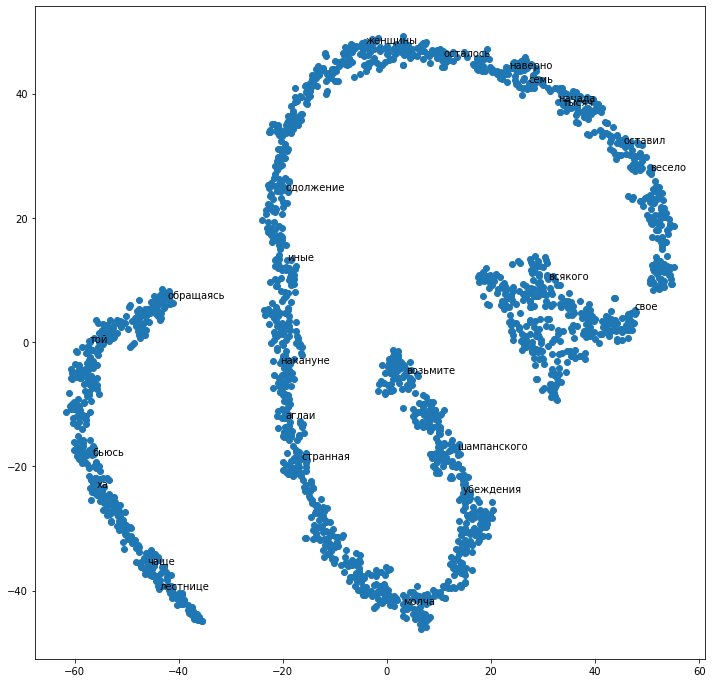

In [34]:
plot_words(x_vals, y_vals, labels)

Таким образом, модель Word2Vec представляет очень мощный(и быстрый) способ векторизации текста в пространство низкой размерности с учетом контекста.